# Урок 1. Алгоритм линейной регрессии. Градиентный спуск

### Домашние задания

1. Проведите небольшое исследование алгоритма градиентного спуска. Оцените влияние значений скорости обучения (`alpha`) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между
собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. 

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T # стаж репетитора
X.shape

(10, 2)

In [3]:
# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [4]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [28]:
n = X.shape[0]
w = np.array([1, 0.5])
errs = []
alphas = []
for alpha in np.arange(0.001, 0.09, 0.001):
    for i in range(1000 + 1):
      y_pred = np.dot(w, X.T)
      err = calc_mse(y, y_pred)
      for j in range(w.shape[0]):
          w[j] -= alpha * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
      if i % 500 == 0:
          errs.append(err)
          alphas.append(alpha)
          print(alpha, i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

0.001 0 [1.1102 0.84  ] 3173.15
0.001 500 [21.04606457  8.74617136] 415.355423398327
0.001 1000 [31.66648131  6.78503276] 176.46806566379882
0.002 0 [31.69885105  6.77905544] 176.1967605850534
0.002 500 [41.7465635   4.92366848] 62.18275791435534
0.002 1000 [45.29491144  4.26843889] 47.96352412694949
0.003 0 [45.30095433  4.26732302] 47.95510640937452
0.003 500 [46.82718503  3.98549285] 46.026216970299274
0.003 1000 [47.1472258   3.92639487] 45.941401009028574
0.004 0 [47.14757898  3.92632965] 45.94137670983431
0.004 500 [47.22161936  3.91265753] 45.93756003621756
0.004 1000 [47.23083327  3.91095611] 45.93750092974393
0.005 0 [47.23084008  3.91095485] 45.93750092202619
0.005 500 [47.2320467   3.91073204] 45.93750000502343
0.005 1000 [47.23213576  3.9107156 ] 45.93750000002734
0.006 0 [47.2321358   3.91071559] 45.93750000002709
0.006 500 [47.23214255  3.91071434] 45.93750000000006
0.006 1000 [47.23214284  3.91071429] 45.93750000000001
0.007 0 [47.23214284  3.91071429] 45.937500000000014

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


0.084 1000 [2.04099119e+170 1.10528386e+171] inf
0.085 0 [-3.19133195e+170 -1.72824248e+171] inf
0.085 500 [-3.71019915e+267 -2.00923122e+268] inf
0.085 1000 [nan nan] nan
0.08600000000000001 0 [nan nan] nan
0.08600000000000001 500 [nan nan] nan
0.08600000000000001 1000 [nan nan] nan
0.08700000000000001 0 [nan nan] nan
0.08700000000000001 500 [nan nan] nan
0.08700000000000001 1000 [nan nan] nan
0.08800000000000001 0 [nan nan] nan
0.08800000000000001 500 [nan nan] nan
0.08800000000000001 1000 [nan nan] nan
0.089 0 [nan nan] nan
0.089 500 [nan nan] nan
0.089 1000 [nan nan] nan


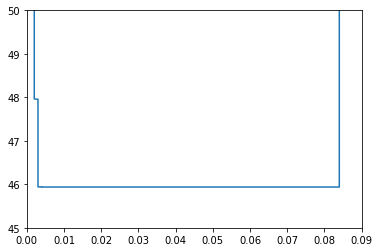

In [34]:
plt.axis([0,0.09, 45,50])
plt.plot(alphas, errs)
plt.show()

На графике видно, что значение alpha лежит в диапазоне от 0.01 до 0.08 с постоянной ошибкой вне зависимости от количества итераций. До плато - чем больше итераций, тем меньше ошибка.

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [37]:
w = np.array([1, 0.5])
alpha = 1e-2

for i in range(1000):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    '''for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))'''
    w -= alpha * (1/n * 2 * np.dot(X.T, (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001842
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
900 [47.228558    3.91137626] 45.937507054979434


In [ ]:
*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. 

Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере $\text{diff}=10^{-6}$, а значение $\alpha=10^{-2}$?

In [39]:
w = np.array([1, 0.5])
diff = 1e-6
alpha = 1e-2
iter = 0
err_pred = 0.0001
while True:
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    w -= (alpha * (1/n * 2 * np.dot(X.T, (y_pred - y))))
    iter +=1
    if np.abs(err - err_pred) <= 1e-6:
        print('Stop:', i, w, err)
        break
    else:
        err_pred = err

Stop: 999 [47.22286276  3.91242793] 45.937547277798465
